# Case Study: Binary Classification - Diabetes (1/0)

In [69]:
# Load libraries
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#NEW imports
import numpy as np


In [70]:
##Load the dataset
#df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/temp/diabetes.csv')

#Print the first 5 rows of the dataframe.
#df.head()

url = "https://raw.githubusercontent.com/rrichajalota/Pima-Indians-Diabetes-kaggle/master/diabetes.csv"
path = '../Assignment Six/'
filename = 'diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

dataset = read_csv(path+filename)
array = dataset.values
X = array[:,0:8]
y = array[:,8]


In [71]:
# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)
# types
set_option('display.max_rows', 500)
print(dataset.dtypes)
# head
set_option('display.width', 100)
print(dataset.head(20))
# descriptions, change precision to 3 places
set_option('display.precision', 3)
print(dataset.describe())

# # class distribution    # ORITINALLY, NOT WORKING; thus, Outcome(int) is converted to Outcome(str)
dataset['Outcome'] = dataset['Outcome'].apply(str)
print(dataset.groupby('Outcome').size())

(768, 9)
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  \
0             6      148             72             35        0  33.6                     0.627   
1             1       85             66             29        0  26.6                     0.351   
2             8      183             64              0        0  23.3                     0.672   
3             1       89             66             23       94  28.1                     0.167   
4             0      137             40             35      168  43.1                     2.288   
5             5      116             74              0     

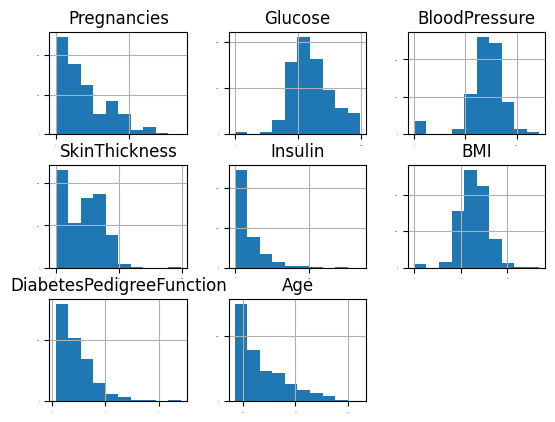

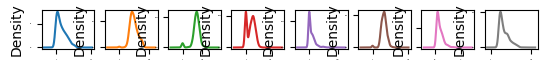

In [72]:
# Data visualizations

# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
pyplot.show()


C:\Users\amcga\AppData\Local\Temp\ipykernel_4320\4238217247.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')


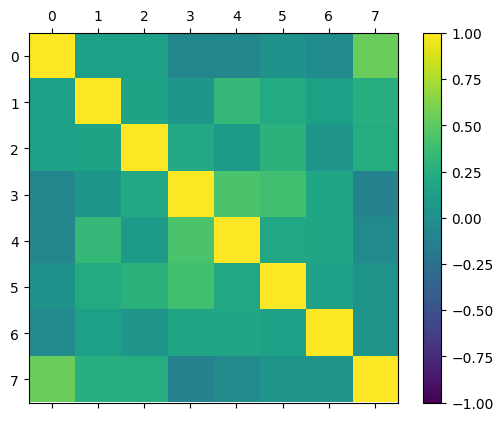

In [73]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

In [74]:
# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,0:8].astype(float)
y = array[:,8]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)



In [75]:
# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'


In [76]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('AdaBoost', AdaBoostClassifier()))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.760947 (0.050121)
LDA: 0.770756 (0.058514)
KNN: 0.710206 (0.049772)
CART: 0.677737 (0.040473)
NB: 0.749418 (0.041042)
SVM: 0.656584 (0.052639)
AdaBoost: 0.739662 (0.048027)


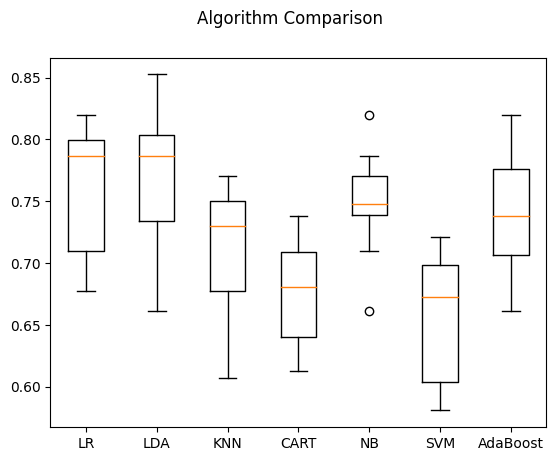

In [77]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [78]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
pipelines.append(('ScaledAdaBoost', Pipeline([('Scaler', StandardScaler()),('AdaBoost', AdaBoostClassifier())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


ScaledLR: 0.767425 (0.050332)
ScaledLDA: 0.770756 (0.058514)
ScaledKNN: 0.724881 (0.046641)
ScaledCART: 0.684268 (0.057206)
ScaledNB: 0.749418 (0.041042)
ScaledSVM: 0.743046 (0.051903)
ScaledAdaBoost: 0.739662 (0.048027)


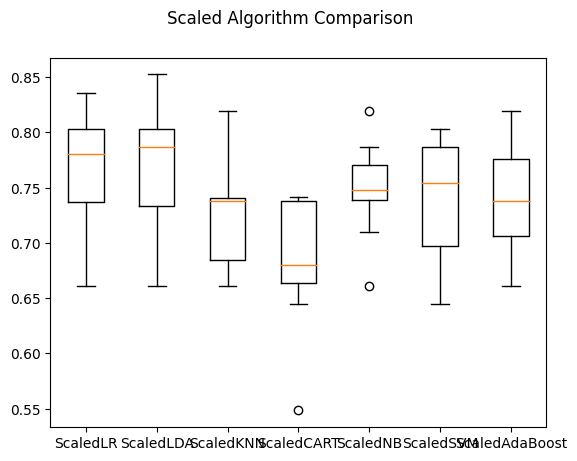

In [79]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [80]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.733078 using {'n_neighbors': 17}
0.693760 (0.028478) with: {'n_neighbors': 1}
0.723083 (0.048219) with: {'n_neighbors': 3}
0.723268 (0.048010) with: {'n_neighbors': 5}
0.711898 (0.051870) with: {'n_neighbors': 7}
0.718350 (0.046818) with: {'n_neighbors': 9}
0.721682 (0.043955) with: {'n_neighbors': 11}
0.705394 (0.043927) with: {'n_neighbors': 13}
0.728318 (0.051346) with: {'n_neighbors': 15}
0.733078 (0.038673) with: {'n_neighbors': 17}
0.725013 (0.054130) with: {'n_neighbors': 19}
0.723480 (0.059549) with: {'n_neighbors': 21}


In [81]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.769064 using {'C': 0.1, 'kernel': 'linear'}
0.769064 (0.047491) with: {'C': 0.1, 'kernel': 'linear'}
0.715177 (0.053064) with: {'C': 0.1, 'kernel': 'poly'}
0.700635 (0.059778) with: {'C': 0.1, 'kernel': 'rbf'}
0.757641 (0.048427) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.765812 (0.048219) with: {'C': 0.3, 'kernel': 'linear'}
0.731438 (0.045649) with: {'C': 0.3, 'kernel': 'poly'}
0.754416 (0.047183) with: {'C': 0.3, 'kernel': 'rbf'}
0.744527 (0.034686) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.765812 (0.048219) with: {'C': 0.5, 'kernel': 'linear'}
0.734744 (0.052342) with: {'C': 0.5, 'kernel': 'poly'}
0.751137 (0.044750) with: {'C': 0.5, 'kernel': 'rbf'}
0.754257 (0.030519) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.764199 (0.048718) with: {'C': 0.7, 'kernel': 'linear'}
0.733210 (0.054412) with: {'C': 0.7, 'kernel': 'poly'}
0.742993 (0.046810) with: {'C': 0.7, 'kernel': 'rbf'}
0.744368 (0.028586) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.764199 (0.048718) with: {'C': 0.9, 'kernel': 'line

In [82]:
#NEW function to tune a given scaled model
def tuneScaledModel(model, param_grid):
    scaler = StandardScaler().fit(X_train)
    rescaledX = scaler.transform(X_train)
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid_result = grid.fit(rescaledX, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

In [83]:
#apply tuneScaledModel to all models

# Tune scaled LR
param_grid = dict(C=np.array([0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]))
model = LogisticRegression(solver='liblinear')
tuneScaledModel(model, param_grid)

Best: 0.767425 using {'C': 0.7}
0.764146 (0.049990) with: {'C': 0.1}
0.765812 (0.052374) with: {'C': 0.3}
0.765812 (0.050348) with: {'C': 0.5}
0.767425 (0.050332) with: {'C': 0.7}
0.767425 (0.050332) with: {'C': 0.9}
0.767425 (0.050332) with: {'C': 1.0}
0.764146 (0.049485) with: {'C': 1.3}
0.764146 (0.049485) with: {'C': 1.5}
0.764146 (0.049485) with: {'C': 1.7}
0.764146 (0.049485) with: {'C': 2.0}


In [84]:
# Tune scaled LDA
param_grid = dict(solver=['svd', 'lsqr', 'eigen'])
model = LinearDiscriminantAnalysis()
tuneScaledModel(model, param_grid)

Best: 0.770756 using {'solver': 'svd'}
0.770756 (0.058514) with: {'solver': 'svd'}
0.769117 (0.056868) with: {'solver': 'lsqr'}
0.769117 (0.056868) with: {'solver': 'eigen'}


In [85]:
# Tune scaled KNN
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
tuneScaledModel(model, param_grid)

Best: 0.733078 using {'n_neighbors': 17}
0.693760 (0.028478) with: {'n_neighbors': 1}
0.723083 (0.048219) with: {'n_neighbors': 3}
0.723268 (0.048010) with: {'n_neighbors': 5}
0.711898 (0.051870) with: {'n_neighbors': 7}
0.718350 (0.046818) with: {'n_neighbors': 9}
0.721682 (0.043955) with: {'n_neighbors': 11}
0.705394 (0.043927) with: {'n_neighbors': 13}
0.728318 (0.051346) with: {'n_neighbors': 15}
0.733078 (0.038673) with: {'n_neighbors': 17}
0.725013 (0.054130) with: {'n_neighbors': 19}
0.723480 (0.059549) with: {'n_neighbors': 21}


In [86]:
# Tune scaled Decision Tree
param_grid = dict(criterion=['gini', 'entropy'], max_depth=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
model = DecisionTreeClassifier()
tuneScaledModel(model, param_grid)

Best: 0.742940 using {'criterion': 'gini', 'max_depth': 2}
0.742940 (0.048287) with: {'criterion': 'gini', 'max_depth': 2}
0.708752 (0.043083) with: {'criterion': 'gini', 'max_depth': 4}
0.715389 (0.065691) with: {'criterion': 'gini', 'max_depth': 6}
0.690904 (0.065270) with: {'criterion': 'gini', 'max_depth': 8}
0.687652 (0.060844) with: {'criterion': 'gini', 'max_depth': 10}
0.679376 (0.051691) with: {'criterion': 'gini', 'max_depth': 12}
0.679482 (0.059574) with: {'criterion': 'gini', 'max_depth': 14}
0.677842 (0.066557) with: {'criterion': 'gini', 'max_depth': 16}
0.677816 (0.055449) with: {'criterion': 'gini', 'max_depth': 18}
0.677869 (0.063660) with: {'criterion': 'gini', 'max_depth': 20}
0.732998 (0.042692) with: {'criterion': 'entropy', 'max_depth': 2}
0.708805 (0.050151) with: {'criterion': 'entropy', 'max_depth': 4}
0.710312 (0.057920) with: {'criterion': 'entropy', 'max_depth': 6}
0.708831 (0.060645) with: {'criterion': 'entropy', 'max_depth': 8}
0.692623 (0.072200) with: {

In [87]:
# Tune scaled NB
param_grid = dict(var_smoothing=np.array([1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]))
model = GaussianNB()
tuneScaledModel(model, param_grid)

Best: 0.751031 using {'var_smoothing': 0.01}
0.749418 (0.041042) with: {'var_smoothing': 1e-09}
0.749418 (0.041042) with: {'var_smoothing': 1e-08}
0.749418 (0.041042) with: {'var_smoothing': 1e-07}
0.749418 (0.041042) with: {'var_smoothing': 1e-06}
0.749418 (0.041042) with: {'var_smoothing': 1e-05}
0.749418 (0.041042) with: {'var_smoothing': 0.0001}
0.749418 (0.041042) with: {'var_smoothing': 0.001}
0.751031 (0.041033) with: {'var_smoothing': 0.01}
0.751005 (0.035007) with: {'var_smoothing': 0.1}
0.725040 (0.044532) with: {'var_smoothing': 1.0}


In [88]:
# Tune scaled SVM
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
tuneScaledModel(model, param_grid)

Best: 0.769064 using {'C': 0.1, 'kernel': 'linear'}
0.769064 (0.047491) with: {'C': 0.1, 'kernel': 'linear'}
0.715177 (0.053064) with: {'C': 0.1, 'kernel': 'poly'}
0.700635 (0.059778) with: {'C': 0.1, 'kernel': 'rbf'}
0.757641 (0.048427) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.765812 (0.048219) with: {'C': 0.3, 'kernel': 'linear'}
0.731438 (0.045649) with: {'C': 0.3, 'kernel': 'poly'}
0.754416 (0.047183) with: {'C': 0.3, 'kernel': 'rbf'}
0.744527 (0.034686) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.765812 (0.048219) with: {'C': 0.5, 'kernel': 'linear'}
0.734744 (0.052342) with: {'C': 0.5, 'kernel': 'poly'}
0.751137 (0.044750) with: {'C': 0.5, 'kernel': 'rbf'}
0.754257 (0.030519) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.764199 (0.048718) with: {'C': 0.7, 'kernel': 'linear'}
0.733210 (0.054412) with: {'C': 0.7, 'kernel': 'poly'}
0.742993 (0.046810) with: {'C': 0.7, 'kernel': 'rbf'}
0.744368 (0.028586) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.764199 (0.048718) with: {'C': 0.9, 'kernel': 'line

In [89]:
# Tune scaled AdaBoost
param_grid = dict(n_estimators=np.array([50, 100, 150, 200, 250, 300, 350, 400]))
model = AdaBoostClassifier()
tuneScaledModel(model, param_grid)

Best: 0.739662 using {'n_estimators': 50}
0.739662 (0.048027) with: {'n_estimators': 50}
0.729931 (0.048921) with: {'n_estimators': 100}
0.723295 (0.043976) with: {'n_estimators': 150}
0.710286 (0.049238) with: {'n_estimators': 200}
0.707033 (0.051907) with: {'n_estimators': 250}
0.716790 (0.055590) with: {'n_estimators': 300}
0.708646 (0.049186) with: {'n_estimators': 350}
0.698942 (0.054165) with: {'n_estimators': 400}


LDA has the best performance using the svd solver, at 0.770756, but has a standard deviation of 0.058514

In [90]:
# Save Model Using Pickle
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Fit the model on 80%
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
result = model.score(X_train, y_train)
print(result)
result = model.score(X_test, y_test)
print(result)

# save the model to disk
filename = 'finalized_model_pickle.sav'
filename = path + filename
dump(model, open(filename, 'wb'))

# some time later...
import time
time.sleep(5)
# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7768729641693811
0.7922077922077922
0.7922077922077922


In [91]:
# Save Model Using joblib
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from joblib import dump
from joblib import load

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Fit the model on 80%
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
result = model.score(X_train, y_train)
print(result)
result = model.score(X_test, y_test)
print(result)

# save the model to disk
filename = 'finalized_model_joblib.sav'
filename = path + filename
dump(model, filename)

# some time later...
import time
time.sleep(5)
# load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, y_test)
print(result)


0.7768729641693811
0.7922077922077922
0.7922077922077922


In [94]:
#NEW save the best performing model using joblib
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from joblib import dump
from joblib import load

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Fit the model on 80%
model = LinearDiscriminantAnalysis(solver='svd')
model.fit(X_train, y_train)
result = model.score(X_train, y_train)
print(result)
result = model.score(X_test, y_test)
print(result)

# save the model to disk
filename = 'finalized_model_joblib.sav'
filename = path + filename
dump(model, filename)

# some time later...
import time
time.sleep(5)
# load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.7817589576547231
0.7922077922077922
0.7922077922077922


While LDA has the best training score, it has the same test score as the originally saved logistical regression. For further analysis I will preprocess the data and use the logistical regression.

In [110]:
#NEW preprocessing data before making predictions
import pandas as pd
#removing invalid instances (where the glucose is 0, the blood pressure is 0, 
# the skin thickness is zero, or the insulin is 0, or the BMI is 0)
array = dataset.values
from sklearn.impute import SimpleImputer as Imputer
imputer = Imputer(missing_values=0, strategy='constant', fill_value=np.nan)
imputer = imputer.fit(array[:,1:6])
array[:,1:6] = imputer.transform(array[:,1:6])

#Get rid of the rows with Nan values except for the outcome column
dataset = pd.DataFrame(array)
dataset = dataset.dropna()
array = dataset.values
#split into input (X) and output (y) variables
X = array[:,0:8]
y = array[:,8]

In [111]:
#NEW save the best performing model using joblib
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from joblib import dump
from joblib import load

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Fit the model on 80%
model = LinearDiscriminantAnalysis(solver='svd')
model.fit(X_train, y_train)
result = model.score(X_train, y_train)
print(result)
result = model.score(X_test, y_test)
print(result)

# save the model to disk
filename = 'finalized_model_joblib.sav'
filename = path + filename
dump(model, filename)

# some time later...
import time
time.sleep(5)
# load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.7955271565495208
0.759493670886076
0.759493670886076


Even Though the model did really good with the training data, it did not do as well with the test data. This is a sign of overfitting. In the future I will try to use a different model or use a different preprocessing method.